Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
clustalo is already the newest version (1.2.4-7).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


Saving CA_patents_no_abody_abodies_255_out_full.FASTA to CA_patents_no_abody_abodies_255_out_full (1).FASTA


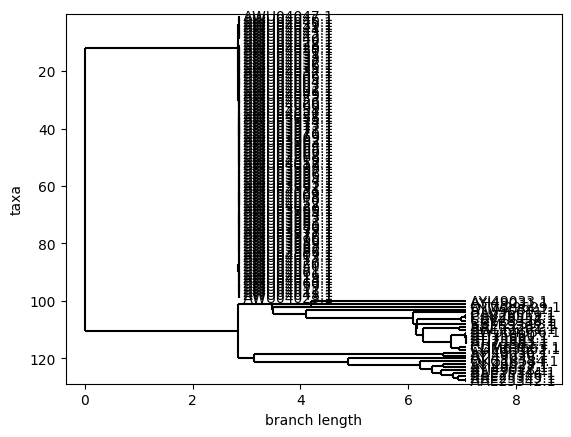

In [2]:
!pip install biopython
!apt-get install -y clustalo
import os
import subprocess
from Bio import Phylo, SeqIO
import matplotlib.pyplot as plt

# Step 1: Upload a multipart FASTA protein file
from google.colab import files
uploaded = files.upload()

# Step 2: Run sequences through Clustal Omega for multiple sequence alignment
for file_name in uploaded.keys():
    fasta_file = file_name
    alignment_file = f"{os.path.splitext(fasta_file)[0]}.aln"
    subprocess.run(["clustalo", "-i", fasta_file, "-o", alignment_file])

# Step 3: Build a Newick tree from the alignment
tree_file = f"{os.path.splitext(fasta_file)[0]}.dnd"
subprocess.run(["clustalo", "--guidetree-out", tree_file, "-i", alignment_file])

# Read the Newick tree from the file
with open(tree_file, 'r') as f:
    newick_tree = f.readline().strip()

# Parse the Newick tree to obtain branch points
def extract_branch_points(newick_tree):
    tree = Phylo.read(tree_file, "newick")
    return [node for node in tree.find_clades()]

branch_points = extract_branch_points(newick_tree)




#Display the Newick tree
tree = Phylo.read(tree_file, "newick")
Phylo.draw(tree)
plt.show()


In [4]:
# Parse the Newick tree to obtain the first branch point
def extract_first_branch_point(newick_tree):
    tree = Phylo.read(tree_file, "newick")
    for node in tree.find_clades():
        if len(node.clades) == 2:  # Assuming binary tree
            return node

first_branch_point = extract_first_branch_point(newick_tree)

# Split the tree into clusters at the first branch point
def split_tree_into_clusters(tree, first_branch_point):
    clusters = {}
    for idx, child in enumerate(first_branch_point.clades):
        clusters[f"Cluster_{idx + 1}"] = {}
        for leaf in Phylo.BaseTree.Clade.get_terminals(child):
            clusters[f"Cluster_{idx + 1}"][leaf.name] = ""
    return clusters

clusters = split_tree_into_clusters(newick_tree, first_branch_point)

# Write sequences of each cluster into new FASTA files
def write_fasta_file(cluster, cluster_name):
    with open(f"{cluster_name}.fasta", 'w') as f:
        for seq_id in cluster.keys():
            f.write(f">{seq_id}\n")  # No sequence data, as it's not available in the Newick tree

# Write sequences into new FASTA files
for cluster_name, cluster in clusters.items():
    write_fasta_file(cluster, cluster_name)